In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Informaçoes sobre o dados :

**Load the Cancer data**

O exemplo é baseado no dados que é publicamente disponivel no repositorio UCI de Machine Learning (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html].

O conjunto de dados consiste em várias centenasde registros de amostra de células humanas, cada um delas contêm o valo de um conjunto de caracteristicas das células. O campo em cada registro são:

|   Nome      |   Descrição                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

Para os fins deste exemplo, estamos usando um conjunto de dados que possui um número relativamente pequeno de preditores em cada registro.


## Carregando os dados.

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


O "**ID**" contem a identificação do paciente!

As caracteristicas dos conjunto de células de cada paciente são contidas no "**Clump**" a "**Mit**". Os calores variam de 1 a 10, sendo 1 o mais proximo de benigno.

A "**Class**" contem o diagnostico, com as confirmações pelo procedimentos médicos separados. Sendo 2 para o caso benigno e 4 para maligno.

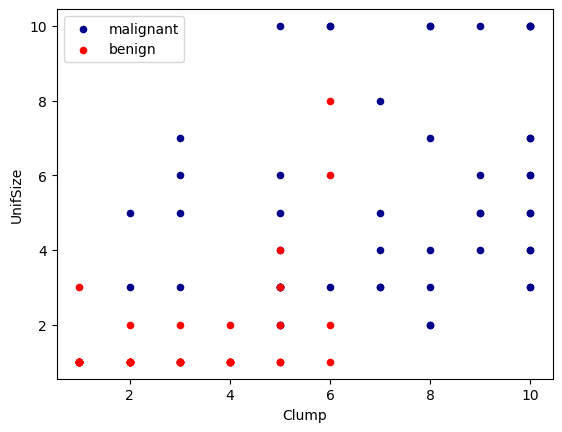

In [6]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[     df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='benign', ax=ax);
plt.show()

## Pre-processamento de dados e seleção

In [7]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Podemos notar que a caracteristica "BareNuc" é do tipo objeto, mas cada celular dele é um número, portanto devemos ajustar.

In [10]:
pd.to_numeric(df['BareNuc'],errors='coerce' ).notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
694    True
695    True
696    True
697    True
698    True
Name: BareNuc, Length: 699, dtype: bool

In [23]:
df = df[pd.to_numeric(df['BareNuc'],errors='coerce' ).notnull()  ]

# .to_numeric esta convertendo objento em float
# .notnull() está verificando se apos está trasnformação ainda resta algum celular que não é um número.
# Caso ainda reste uma célula que não seja número ela irá ser eliminada.

# Por fim vamos converte em número novamente

df['BareNuc'] = df['BareNuc'].astype(int)
# .astype() converte a toda a coluna para o tipo float
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object